In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  

/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Using matplotlib backend: MacOSX


In [2]:
#load data
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,55,53,55,61,39,36,30,52,54,46,55,59,63,70,66,63,58,23],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,12,20,28,18,29,33,24,45,45,52,55,53,55,61]
})
np.random.seed(200)
colmap = {1:'r',2:'g',3:'b',4:'o',5:'grey',6:'y'}



In [3]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['{}'.format(i)]=(np.sqrt(
                (df['x']-centroids[i][0])**2 + 
                (df['y']-centroids[i][1])**2))
    
    
    
    centroids_distance_cols = ['{}'.format(i)for i in centroids.keys()]
    df['closest']= df.loc[:,centroids_distance_cols].idxmin(axis=1)
    df['closest']= df['closest'].map(lambda x:(x.lstrip('')))
    df['color']= df['closest'].map(lambda x:colmap[int(x)])
    
    return df


In [4]:
def update(k):
    for i in centroids.keys():
        k[i][0] = np.mean(df[df['closest']==str(i)]['x'])
        k[i][1] = np.mean(df[df['closest']==str(i)]['y'])
    return k



In [6]:
#calculate best k
def kmean(df,k):
    global centroids
    global cost
    #init centroids
    centroids = {
        i+1:[np.random.randint(0,80),np.random.randint(0,80)]
        for i in range(k)
    }
    #label
    df = assignment(df,centroids)
    #update centroid
    centroids = update(centroids)
    while True:
        closest_centriods = df['closest'].copy(deep=True)
        centroids = update(centroids)
        df= assignment(df,centroids)
        if closest_centriods.equals(df['closest']):
            break
    cost = 0
    for i in centroids.keys():
        #print((df[df['closest']==str(i)][str(i)]).sum())
        cost  = cost + (df[df['closest']==str(i)][str(i)]).sum()
        
    return cost

In [92]:
def best_k(df,k):
    global centroids
    total = []
    ce = []
    thresold = []
    for i in range(1,k):
        total.append(kmean(df,i))
        #centroidsdistance(k,centroids)
        #print("cost",kmean(df,i))
        ce.append(centroids)
        #print("centroids",centroids)
    return total,ce

In [97]:
def centroidsdistance(k,ce):
    cost = []
    if k == 1:
        print("cost")
        return cost.append(0)
    if k == 2:
        cost.append((np.sqrt((ce[1][1][0]-ce[1][2][0])**2 + (ce[1][1][1]-ce[1][2][1])**2)))
    if k >= 3:
        
        for i in range(1,k):
            for j in range(i+1,k):
                cost.append((np.sqrt((ce[k-2][i][0]-ce[k-2][j][0])**2 + (ce[k-2][i][1]-ce[k-2][j][1])**2)).sum()) 
    return cost

In [144]:
df

,x,y,1,closest,color,2,3,4,5
0,12,39,52.517193,2,g,14.655918,45.738994,35.798648,19.817164
1,20,36,45.644155,2,g,13.280337,41.094066,27.282247,18.409780
2,28,30,40.874469,4,o,19.721531,40.266474,17.571723,23.742788
3,18,52,45.181732,2,g,5.587888,34.680286,38.509579,7.570997
4,29,54,34.313101,2,g,8.031824,23.679574,33.694525,3.622154
5,33,46,30.551414,2,g,10.714286,24.753227,24.751855,10.748023
6,24,55,39.387674,2,g,6.136209,28.048569,37.103293,1.979899
7,45,59,19.917887,3,b,24.426483,7.168604,34.891720,20.330273
8,45,63,21.864482,3,b,26.318303,5.835714,38.891428,21.737525
9,52,70,22.182325,3,b,36.036829,6.932211,46.488815,31.249320


In [148]:
for i in range(1,6):
    total,ce = best_k(df,i)
    print(ce)
    dis = centroidsdistance(i-1,ce)
    
    

[]
[{1: [44.42857142857143, 44.42857142857143]}]
cost
[{1: [44.42857142857143, 44.42857142857143]}, {1: [37.23076923076923, 30.0], 2: [50.666666666666664, 56.93333333333333]}]
[{1: [44.42857142857143, 44.42857142857143]}, {1: [26.545454545454547, 39.36363636363637], 2: [56.0, 47.705882352941174]}, {1: [44.55555555555556, 24.11111111111111], 2: [22.714285714285715, 49.0], 3: [57.0, 57.0]}]
[{1: [44.42857142857143, 44.42857142857143]}, {1: [39.36363636363637, 26.545454545454547], 2: [47.705882352941174, 56.0]}, {1: [49.0, 22.714285714285715], 2: [57.0, 57.0], 3: [24.11111111111111, 44.55555555555556]}, {1: [24.11111111111111, 44.55555555555556], 2: [50.833333333333336, 63.166666666666664], 3: [49.0, 22.714285714285715], 4: [63.166666666666664, 50.833333333333336]}]


In [149]:
total

[618.7446632584216, 443.90986255851135, 298.4170692740165, 249.63454058066804]

# 1.用变化速率判断k值

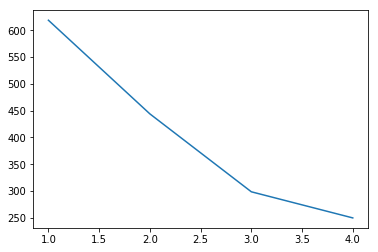

In [152]:
x =[1,2,3,4]
plt.figure()
plt.plot(x,total)

## k should be  3

# 2.用聚内距离差/聚间距离差 < 阀值确定

In [140]:
threshold  = []
for i in range(3):
    threshold.append(total[i+1]/dis[i])
    

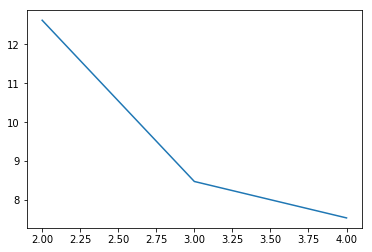

In [153]:
x =[2,3,4]
plt.figure()
plt.plot(x,threshold)